# Marvellous Comics: mirror of society?
Superheroes and villains in comics can have a real impact on society. They’re supposed to represent what’s good and bad. Thus, the way the character is portrayed will have an influence on the reader. If for example all villains are part of the same minority, people will unconsciously see them in real life as bad people. Moreover, a character like Tony Stark could inspire people to study engineering. And these are just examples to illustrate the power comics can have on us.
We can thus study this choice of characters, how diverse it is, and if there is a tendency towards a specific portrait for superheroes and villains. 

## Data Acquisition
Here, the aim is to load the datasets, merge and combine them. Build the datawarehouse, that is easy to work on.

### Parsing the web, and loading dataset from web

In [1]:
# Import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import math
import re
import string

### Make the database ready-to-use

In [2]:
personnage = pd.read_pickle("personnage_url.txt").copy()
personnage.head(3)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,,Aakon,Single,Slave trader,,Male,,,Brown,Black,Planet Oorga
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed)[1],Secret Identity,2-D,American,Single,Adventurer,,Male,,,Brown,Brown,
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine[1],Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",160 lbs (73 kg),Brown,Black (graying),Germany


## Data acquaintance

In [3]:
#Check if we have any missing values
personnage.isnull().values.any()

False

***Now, we will have a look at every column and study how there are filled in order to better comprehend the data and clean it***

In [4]:
#We start with the Real Name of the characters
personnage['Real Name'].value_counts()

nknown                                                       3666
Unknown                                                       462
Unrevealed                                                    108
Not Applicable                                                 27
Unknown (The symbiote takes the name of its current host)      24
                                                             ... 
Wally Bevins                                                    1
Václav Draxon[1]                                                1
M'Dhar                                                          1
Jim Collins                                                     1
Daniel Grimm                                                    1
Name: Real Name, Length: 22947, dtype: int64

***Regarding the real Name, we can observe that we have a few categories of unknown names, we are going to group them together under the label 'Unknown'***

In [5]:
personnage.loc[personnage['Real Name']=='nknown', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='Unrevealed', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='N/A', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='Unknown (The symbiote takes the name of its current host)', 'Real Name'] ='Unknown'
personnage.loc[personnage['Real Name']=='None', 'Real Name'] ='Unknown'
personnage["Real Name"] = personnage["Real Name"].str.replace(r'\s\[\d\]', '')
personnage["Real Name"] = personnage["Real Name"].str.replace(r'\[\d\]', '')
personnage['Real Name'].value_counts()

Unknown                                       4297
Not Applicable                                  27
Martin (full name unrevealed)                   11
James "Jamie" Arthur Madrox                     10
Thor Odinson                                     6
                                              ... 
Flexo                                            1
His full name is unpronounceable by Humans       1
Narvi                                            1
Karen Trudeaux                                   1
Henry Todd                                       1
Name: Real Name, Length: 22866, dtype: int64

***We now look at the identity of the characters***

In [6]:
personnage["Identity"].value_counts()

No Dual Identity                                                                                                                                                      14653
Secret Identity                                                                                                                                                        7311
Public Identity                                                                                                                                                        2953
                                                                                                                                                                       2882
Known to Authorities Identity                                                                                                                                           144
No Dual Identity [1]                                                                                                                        

***It looks like the identities are distribiuted among 'No Dual Identity', 'Secret Identity', 'Public Identity' and 'Known to Authorities Identity'***

In [7]:
personnage["Identity"] = personnage["Identity"].str.replace(r'\s\[\d\]', '')
personnage["Identity"] = personnage["Identity"].str.replace(r'\[\d\]', '')
personnage["Identity"] = personnage["Identity"].replace([''], 'Unknown')
personnage.loc[personnage['Identity'].str.contains('Dual'), 'Identity'] = 'No Dual Identity'
personnage.loc[personnage['Identity'].str.contains('Authorities'), 'Identity'] = 'Known to Authorities Identity'
personnage.loc[personnage['Identity'].str.contains('Public'), 'Identity'] = 'Public Identity'
personnage.loc[personnage['Identity'].str.contains('Secret'), 'Identity'] = 'Secret Identity'
personnage.loc[personnage['Identity'].str.contains('Dial'), 'Identity'] = 'No Dual Identity'
personnage.loc[personnage['Identity'].str.contains('Robot'), 'Identity'] = 'Public Identity'
personnage["Identity"].value_counts()

No Dual Identity                 14677
Secret Identity                   7331
Public Identity                   2965
Unknown                           2882
Known to Authorities Identity      154
Name: Identity, dtype: int64

***We continue with the Alias***

In [8]:
personnage["Current Alias"].value_counts()

                  15844
Nova                 28
Ghost Rider          16
Crimson Dynamo       16
Black Knight         15
                  ...  
Barf                  1
Baron Boche           1
Red Poppy             1
Cosmic Man            1
Mindstar              1
Name: Current Alias, Length: 10047, dtype: int64

In [9]:
personnage.loc[personnage['Current Alias']=='', 'Current Alias'] ='Unknown'
personnage['Current Alias'] = personnage['Current Alias'].str.replace(r'\s\[\d\]', '')
personnage['Current Alias'] = personnage['Current Alias'].str.replace(r'\[\d\]', '')
personnage["Current Alias"].value_counts().head(50)

Unknown             15845
Nova                   28
Ghost Rider            18
Black Knight           16
Crimson Dynamo         16
Guardsman              14
Captain America        14
Smasher                14
Baron Zemo             13
Black Widow            11
Cyclops                11
Executioner            11
Wendigo                11
Hobgoblin              11
Vulture                10
Wolverine               9
Aries                   9
Black Panther           9
Beetle                  9
Hulk                    9
Sentry                  9
Red Skull               8
Iron Man                8
Fang                    8
Brain                   8
Thor                    8
Beast                   8
Spider-Man              8
Scarlet Spider          8
Spike                   7
Hawkeye                 7
Firebrand               7
Multiple Man            7
Jack O'Lantern          7
Jackal                  7
Iron Fist               7
Riot                    7
Ms. Marvel              7
Satan       

***Citizenship***

In [10]:
personnage["Citizenship"].value_counts()

American                    10392
                             8188
United States                 520
British                       499
German                        469
                            ...  
Heaven, [1]                     1
Shi'ar Empire, Strontian        1
American, Lemurian              1
Mount Asgard                    1
Libya                           1
Name: Citizenship, Length: 1546, dtype: int64

In [11]:
personnage.loc[personnage["Citizenship"]=="", 'Citizenship'] = 'Unknown'
personnage.loc[personnage["Citizenship"]=="USA", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="United States of America", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="United States", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="America", 'Citizenship'] = 'American'
personnage.loc[personnage["Citizenship"]=="British, English", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="United Kingdom", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="English", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="Scottish, British", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="British, Scottish", 'Citizenship'] = 'British'
personnage.loc[personnage["Citizenship"]=="English, British", 'Citizenship'] = 'British'
personnage["Citizenship"] = personnage["Citizenship"].str.replace(r'\s\[\d\]', '')
personnage["Citizenship"] = personnage["Citizenship"].str.replace(r'\[\d\]', '')
personnage["Citizenship"].value_counts()

American                             11033
Unknown                               8190
British                                731
German                                 469
Canadian                               327
                                     ...  
British, Chinese                         1
American, formerly Dimension Ecch        1
Mortakan                                 1
Anmerican                                1
Oblitus                                  1
Name: Citizenship, Length: 1527, dtype: int64

***Marital Status***

In [12]:
personnage["Marital Status"].value_counts()

                                                                                            16788
Single                                                                                       7993
Married                                                                                      2190
Widowed                                                                                       608
Divorced                                                                                      255
Separated                                                                                      64
Engaged                                                                                        49
Married [citation needed]                                                                       4
Married [1]                                                                                     4
Single [1]                                                                                      3
Separated [3]       

In [13]:
personnage.loc[personnage["Marital Status"]=="", 'Marital Status'] = 'Unknown'
personnage["Marital Status"] = personnage["Marital Status"].str.replace(r'\s\[\d+\]', '')
personnage["Marital Status"] = personnage["Marital Status"].str.replace(r'\[\d+\]', '')
personnage["Marital Status"].value_counts()

Unknown                                                                                     16788
Single                                                                                       7997
Married                                                                                      2196
Widowed                                                                                       610
Divorced                                                                                      257
Separated                                                                                      67
Engaged                                                                                        49
Married [citation needed]                                                                       4
Single (presumed)                                                                               4
Divorced ; Widowed                                                                              2
Married (presumably)

In [14]:
def clean_marital(s):
    if s == '':
        return 'Unknown'
    s = s.replace(r'\s\[\d+\]', '')
    s = s.replace(r'\[\d+\]', '')
    allowed = ['Unknown','Single','Married','Widowed','Separated','Engaged','Divorced', 'Remarried']
    if s in allowed:
        return s
    else:
        try:
            ss = s.split()
            for i in range(len(ss)):
                if ss[i] in allowed:
                    return ss[i]
            if s == 'Singe':
                return 'Single'
            if s == 'single':
                return 'Single'
            if ss[0] == 'Single,':
                return 'Single'
            if s == 'Destroyed':
                return 'Widowed'
            if s == 'married':
                return 'Married'
            if s == 'Claims to be married':
                return 'Married'
            else:
                print(s)
        except:
            print(s)
            print(ss)

#clean marital status
personnage["Marital Status"] = personnage["Marital Status"].apply(clean_marital)

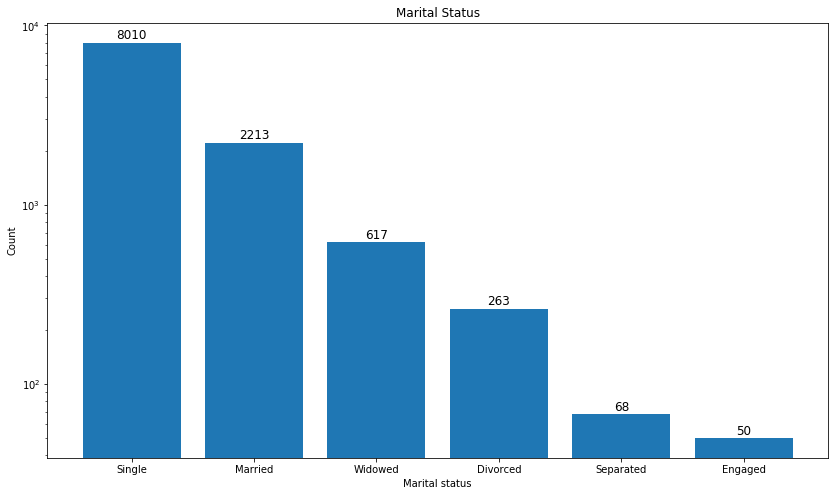

In [15]:
nb_unknown = personnage["Marital Status"].value_counts()['Unknown']
hist_marital = personnage["Marital Status"].value_counts().drop('Unknown')

#plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.bar(x = hist_marital.index, height = hist_marital);
axs.set_title('Marital Status')
axs.set_xlabel('Marital status')
axs.set_ylabel('Count')
axs.set_yscale('log')
for i, v in enumerate(hist_marital):
    axs.text(hist_marital.index[i], v*1.05, str(v), color='black', fontsize=12, horizontalalignment='center')

***Occupation***

In [16]:
personnage["Occupation"].value_counts()

                                                      8700
Student                                                645
Criminal                                               600
Scientist                                              428
Adventurer                                             321
                                                      ... 
Handmaiden of the Queen of Angels                        1
Terrorist, former S.H.I.E.L.D. agent                     1
Tele-operator in sales/support; amateur magic-user       1
Adventurer, soldier, warrior, prince of Mycenae          1
Warrior; formerly accountant                             1
Name: Occupation, Length: 9029, dtype: int64

In [17]:
personnage.loc[personnage["Occupation"]=="",'Occupation'] = 'Unknown'
personnage["Occupation"] = personnage["Occupation"].str.replace(r'\s\[\d+\]', '')
personnage["Occupation"] = personnage["Occupation"].str.replace(r'\[\d+\]', '')
personnage["Occupation"].value_counts()

Unknown                                                            8701
Student                                                             645
Criminal                                                            601
Scientist                                                           428
Adventurer                                                          322
                                                                   ... 
Benevolent god of justice and the beneficial aspects of the sun       1
Adventurer, former rancher                                            1
Pleasure-loving goddess                                               1
Protector; former lawyer                                              1
Time keepers                                                          1
Name: Occupation, Length: 8983, dtype: int64

***Education***

In [18]:
personnage["Education"].value_counts()

                                                                                  26162
Artificial Intelligence                                                              54
Trained on an unnamed world to be a spy                                              51
High School                                                                          39
High school graduate                                                                 35
                                                                                  ...  
High school, possibly unfinished; extensive military and intelligence training        1
Some college[4]                                                                       1
Law Degree                                                                            1
S.H.I.E.L.D. training.                                                                1
Unspecified doctorate                                                                 1
Name: Education, Length: 1140, d

In [19]:
personnage.loc[personnage["Education"]=="", 'Education'] = 'Unknown'
personnage.loc[personnage["Education"]=="Unrevealed", 'Education'] = 'Unknown'
personnage["Education"] = personnage["Education"].str.replace(r'\s\[\d+\]', '')
personnage["Education"] = personnage["Education"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Education"]=="High school graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School Graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School graduate", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High School Student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High school student", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="High-school dropout", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school dropout", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school drop-out", 'Education'] = 'High School Dropout'
personnage.loc[personnage["Education"]=="High school", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="Some high school", 'Education'] = 'High School'
personnage.loc[personnage["Education"]=="Some college", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College Graduate", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College graduate", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College educated", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College education", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="College degree", 'Education'] = 'College'
personnage.loc[personnage["Education"]=="University graduate", 'Education'] = 'University'
personnage.loc[personnage["Education"]=="Ph.D.", 'Education'] = 'Doctorate'
personnage.loc[personnage["Education"]=="PhD", 'Education'] = 'Doctorate'
personnage["Education"].value_counts()

Unknown                                    26177
High School                                  164
College                                       80
Artificial Intelligence                       54
Trained on an unnamed world to be a spy       51
                                           ...  
Architecture degree                            1
Degree in business                             1
Doctorate in chemistry and physics             1
Trained Falcon                                 1
Junior High School student                     1
Name: Education, Length: 1093, dtype: int64

In [20]:
personnage["Gender"].value_counts()

Male                                                                                                                  19787
Female                                                                                                                 6738
                                                                                                                       1264
Agender                                                                                                                 172
Genderfluid                                                                                                              10
Gestalt                                                                                                                   5
Male[1]                                                                                                                   4
Female(Female Clone of Male)                                                                                              3
female  

In [21]:
personnage["Gender"] = personnage["Gender"].str.replace(r'\s\[\d+\]', '')
personnage["Gender"] = personnage["Gender"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Gender"]=="", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="UNCLEAR", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="Male/Female", 'Gender'] = 'Unknown'
personnage.loc[personnage["Gender"]=="Female(as Shub-Niggurath),male(as Sahb Delanzar) (see notes)", 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Male(Originally), Genderfluid (as shapeshifter)", 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Mobile", 'Gender'] = 'Genderfluid'
personnage.loc[personnage["Gender"]=="Female, (formerly Male)", 'Gender'] = 'Transgender'
personnage.loc[personnage["Gender"]=="Female(Female Clone of Male)", 'Gender'] = 'Female'
personnage.loc[personnage["Gender"]=="Male, merged with a mortal female", 'Gender'] = 'Male'
personnage.loc[personnage["Gender"]=="Male(probably)", 'Gender'] = 'Male'
personnage.loc[personnage['Gender'].str.contains('Agender'), 'Gender'] = 'Agender'
personnage["Gender"].value_counts()

Male                                                                                                                  19794
Female                                                                                                                 6743
Unknown                                                                                                                1268
Agender                                                                                                                 177
Genderfluid                                                                                                              13
Gestalt                                                                                                                   5
Transgender                                                                                                               3
female                                                                                                                    2
Female;i

***Height***

In [22]:
personnage["Height"].value_counts()

                                                       24555
Variable                                                 278
6' 0" (1.83 m)                                           268
5' 11" (1.80 m)                                          228
5' 10" (1.78 m)                                          224
                                                       ...  
7' 11" (2.41 m) (Variable)                                 1
5' 8" (1.73 m) , 6'0" (as She-Thing)                       1
6' 2" (1.88 m) ; 5'6" (pre-transformation)                 1
2' 5" (73.66 cm)                                           1
6' 6" (1.98 m) (Current Body); 6'4" (Original Body)        1
Name: Height, Length: 586, dtype: int64

In [23]:
personnage["Height"] = personnage["Height"].str.replace(r'\s\[\d+\]', '')
personnage["Height"] = personnage["Height"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Height"]=="", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Unknown ", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Incalculable ", "Height"] = 'Unknown'
personnage.loc[personnage["Height"]=="Variable ", "Height"] = 'Variable'
personnage.loc[personnage["Height"]=="variable ", "Height"] = 'Variable'
personnage["Height"].value_counts().tail(60)

800' 0" (243.84 m)                                                                                                                 1
5' 4" (1.63 m) (Cassandra Nova),Variable (true form)                                                                               1
15' 5" (4.70 m)                                                                                                                    1
5' 9" (1.75 m) ; 6'0" (in costume)                                                                                                 1
100' 0" (30.48 m) (Variable)                                                                                                       1
6' 4" (1.93 m) ; (as Vengeance) 7'                                                                                                 1
12' 0" (3.66 m) ; 11' (as SODAM) ; 5'8" (in original form)                                                                         1
6' 7" (2.01 m) (as king; 4'5" as hiveling)                           

In [24]:
def clean_height(s):
    if s != 'Unknown' and s!='Variable':
        try:
            temp = re.findall(r'\d+\' \d+\"',s) 
            height = re.findall(r'\d+',temp[0])
            inch = float(height[1])
            feet = float(height[0])
            inch += feet*12
            cm = round(inch * 2.54, 0)
            
            return str(cm)
        except:
            try:
                temp = re.findall(r'\d+\'\d+\"',s) 
                height = re.findall(r'\d+',temp[0])
                inch = float(height[1])
                feet = float(height[0])
                inch += feet*12
                cm = round(inch * 2.54, 0)
                return str(cm)
            except:
                try:
                    temp = re.findall(r'\d+\'',s)
                    height = re.findall(r'\d+',temp[0])
                    inch = 0
                    feet = float(height[0])
                    inch += feet*12
                    cm = round(inch * 2.54, 0)
                    return str(cm)
                except:
                    try:
                        temp = re.findall(r'\d+\"',s)
                        height = re.findall(r'\d+',temp[0])
                        inch = float(height[0])
                        feet = 0
                        inch += feet*12
                        cm = round(inch * 2.54, 0)
                        return str(cm)
                    except:
                        return 'Variable'
            
    else:
        return s

#apply function
personnage["Height in string"] = personnage["Height"].apply(lambda s: clean_height(s))

In [25]:
#convert the string to float, and put nan if unknown or variable
def string_to_float(s):
    try:
        return float(s)
    except:
        return np.nan
personnage["Height in float"] = personnage["Height in string"].apply(string_to_float)
personnage["Height in float"].describe()

count      3125.000000
mean        762.641600
std       14247.283429
min           8.000000
25%         173.000000
50%         180.000000
75%         188.000000
max      609600.000000
Name: Height in float, dtype: float64

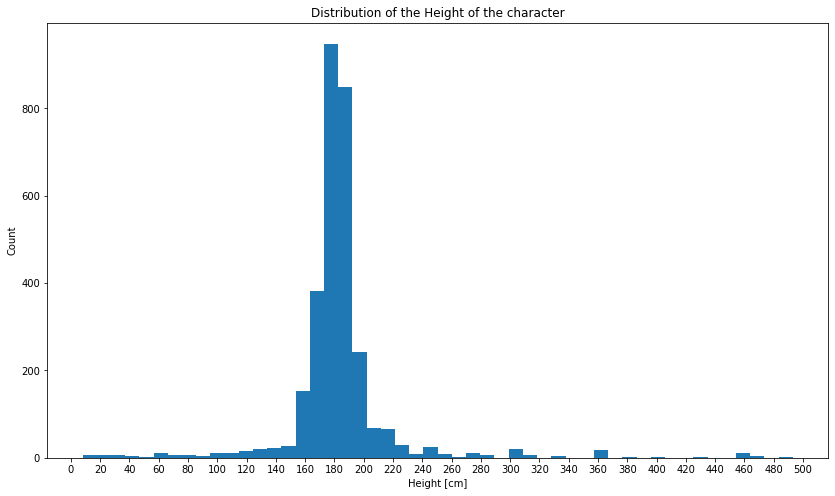

In [26]:
#plot the distribution of height

#number of unknown and variable
nb_unknown = personnage["Height"].value_counts()['Unknown']+personnage["Height"].value_counts()['Variable']
#filter the data to avoid outliers
height_hist = personnage[(personnage["Height in float"]!=np.nan)\
                         &(personnage["Height in float"]<500)]['Height in float']

#plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.hist(height_hist,bins=50);
axs.set_title('Distribution of the Height of the character')
axs.set_xlabel('Height [cm]')
axs.set_ylabel('Count')
plt.xticks(np.arange(0, max(height_hist)+10, 20.0));


***Weight***

In [27]:
personnage["Weight"].value_counts()

                                                                          24704
Variable                                                                    272
180 lbs (82 kg)                                                              95
175 lbs (79 kg)                                                              88
190 lbs (86 kg)                                                              84
                                                                          ...  
1328000 lbs (602371 kg)                                                       1
20000000 lbs (9071850 kg)                                                     1
170 lbs (77 kg) as Abdol;68.4 tons (62 metric tons) as Living Monolith        1
175 lbs (79 kg) (Vale)620 lbs (Savage Steel)                                  1
482 lbs (219 kg)                                                              1
Name: Weight, Length: 867, dtype: int64

In [28]:
personnage["Weight"] = personnage["Weight"].str.replace(r'\s\[\d+\]', '')
personnage["Weight"] = personnage["Weight"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Weight"]=="", "Weight"] = 'Unknown'
personnage.loc[personnage["Weight"]=="Unknown ", "Weight"] = 'Unknown'
personnage.loc[personnage["Weight"]=="variable ", "Weight"] = 'Variable'
personnage.loc[personnage["Weight"]=="Variable ", "Weight"] = 'Variable'
personnage["Weight"].value_counts()

Unknown                                                                   24713
Variable                                                                    282
180 lbs (82 kg)                                                              96
175 lbs (79 kg)                                                              89
190 lbs (86 kg)                                                              85
                                                                          ...  
1328000 lbs (602371 kg)                                                       1
20000000 lbs (9071850 kg)                                                     1
170 lbs (77 kg) as Abdol;68.4 tons (62 metric tons) as Living Monolith        1
175 lbs (79 kg) (Vale)620 lbs (Savage Steel)                                  1
482 lbs (219 kg)                                                              1
Name: Weight, Length: 848, dtype: int64

In [29]:
def clean_weight(s):
    if s != 'Unknown' and s != 'Variable':
        try:
            temp = re.findall(r'\d+\ lbs',s) 
            height = re.findall(r'\d+',temp[0])
            pound = float(height[0])
            kilo = round(0.453*pound,0)
            return str(kilo)
        except:
            return 'Variable'
    else:
        return s

#apply function
personnage["Weight in string"] = personnage["Weight"].apply(lambda s: clean_weight(s))
personnage["Weight in float"] = personnage["Weight in string"].apply(string_to_float)
personnage["Weight in float"].describe()

count    2.968000e+03
mean     5.496837e+08
std      2.993427e+10
min      0.000000e+00
25%      6.300000e+01
50%      8.200000e+01
75%      1.060000e+02
max      1.630800e+12
Name: Weight in float, dtype: float64

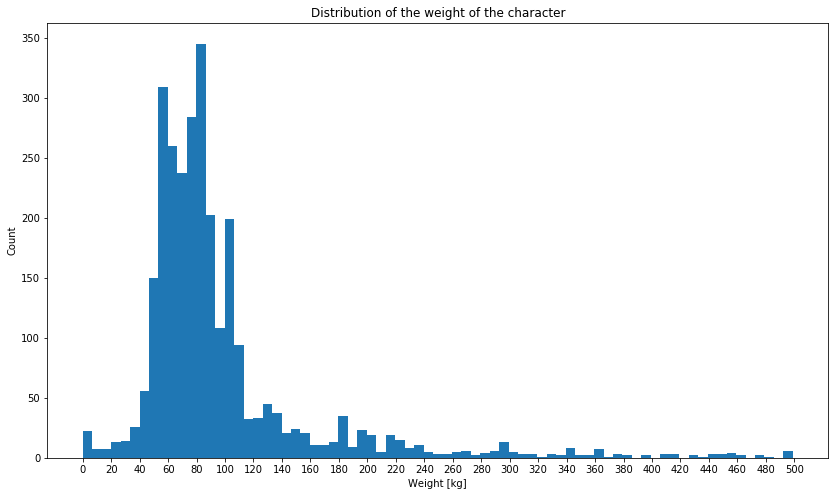

In [30]:
#plot the distribution of Weight

#number of unknown and variable
nb_unknown = personnage["Weight"].value_counts()['Unknown']+personnage["Weight"].value_counts()['Variable']
#filter the data to avoid outliers
weight_hist = personnage[(personnage["Weight in float"]!=np.nan)\
                         &(personnage["Weight in float"]<500)]['Weight in float']

#plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.hist(weight_hist,bins=75);
axs.set_title('Distribution of the weight of the character')
axs.set_xlabel('Weight [kg]')
axs.set_ylabel('Count')
plt.xticks(np.arange(0, max(height_hist)+10, 20.0));

***Eye***

In [31]:
personnage["Eyes"] = personnage["Eyes"].str.replace(r'\s\[\d+\]', '')
personnage["Eyes"] = personnage["Eyes"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Eyes"]=="", "Eyes"] = 'Unknown'
personnage['Eyes'].value_counts().head(10)

Unknown    15390
Brown       4060
Blue        3305
Black       1154
Green        920
Red          694
White        519
Yellow       385
Grey         157
Hazel        142
Name: Eyes, dtype: int64

***Hair***

In [32]:
personnage["Hair"] = personnage["Hair"].str.replace(r'\s\[\d+\]', '')
personnage["Hair"] = personnage["Hair"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Hair"]=="", "Hair"] = 'Unknown'
personnage['Hair'].value_counts().head(10)

Black      6543
Unknown    5646
Brown      4717
Blond      2730
No Hair    1644
White      1233
Bald       1220
Grey       1008
Red         992
Green       157
Name: Hair, dtype: int64

In [33]:
personnage["Place of Birth"] = personnage["Place of Birth"].str.replace(r'\s\[\d+\]', '')
personnage["Place of Birth"] = personnage["Place of Birth"].str.replace(r'\[\d+\]', '')
personnage.loc[personnage["Place of Birth"]=="", "Place of Birth"] = 'Unknown'
personnage["Place of Birth"].value_counts().head(10)

Unknown                    23249
Germany                      185
Attilan                      138
New York City, New York       89
Atlantis                      88
Skrull Empire                 86
Japan                         84
United Kingdom                75
Asgard                        71
Wakanda                       51
Name: Place of Birth, dtype: int64

In [34]:
personnage.head(20)

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float
0,/wiki/Aaron_the_Aakon_(Earth-616),Aaron,Secret Identity,Unknown,Aakon,Single,Slave trader,Unknown,Male,Unknown,Unknown,Brown,Black,Planet Oorga,Unknown,NaN,Unknown,NaN
1,/wiki/2-D_(Earth-616),Darell (full name unrevealed),Secret Identity,2-D,American,Single,Adventurer,Unknown,Male,Unknown,Unknown,Brown,Brown,Unknown,Unknown,NaN,Unknown,NaN
2,/wiki/Abraham_Erskine_(Earth-616),Abraham Erskine,Known to Authorities Identity,Dr. Joseph Reinstein,"German, American",Married,Scientist,Advanced College Degree,Male,"5' 6"" (1.68 m)",160 lbs (73 kg),Brown,Black (graying),Germany,168.0,168.0,72.0,72.0
3,/wiki/11-Ball_(Earth-616),Unknown,Secret Identity,11-Ball,American,Single,Professional criminal; former henchman,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
4,/wiki/Abraham_(Earth-616),Abraham,No Dual Identity,Unknown,Unknown,Married,Prophet,Unknown,Male,Unknown,Unknown,Unknown,Black,Unknown,Unknown,NaN,Unknown,NaN
5,/wiki/Abarac_(Earth-616),Abarac,No Dual Identity,Unknown,Cybernian,Single,"Court magician, advisor",Unknown,Male,Unknown,Unknown,Unknown,White,Unknown,Unknown,NaN,Unknown,NaN
6,/wiki/Abdul_Faoul_(Earth-616),Professor Abdul Faoul,Secret Identity,Scarlet Scarab,Egyptian,Single,"Archeologist, adventurer",Unknown,Male,Unknown,Unknown,Unknown,Black,Egypt,Unknown,NaN,Unknown,NaN
7,/wiki/A.C._O%27Connor_(Earth-616),A. C. O'Connor,No Dual Identity,Ace O'Connor,American,Single,Journalist,Unknown,Female,Unknown,Unknown,Blue,Blond,Unknown,Unknown,NaN,Unknown,NaN
8,/wiki/7-X9_(Earth-616),Unknown,No Dual Identity,7-X9,Unknown,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
9,/wiki/803_(Earth-616),803,No Dual Identity,Unknown,Unknown,Single,Unknown,Unknown,Agender,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN


In [35]:
Gender_df = pd.DataFrame(personnage['Gender'].value_counts())\
              .reset_index()
Gender_df.columns = ['Gender', 'count']
Gender_df['count'] = Gender_df['count'].apply(lambda x: math.sqrt(x))\
                                       .round(2)
Gender_df

,Gender,count
0,Male,140.69
1,Female,82.12
2,Unknown,35.61
3,Agender,13.30
4,Genderfluid,3.61
5,Gestalt,2.24
6,Transgender,1.73
7,female,1.41
8,Female;in her preferred form; she has been kno...,1.00
9,Male and Female,1.00


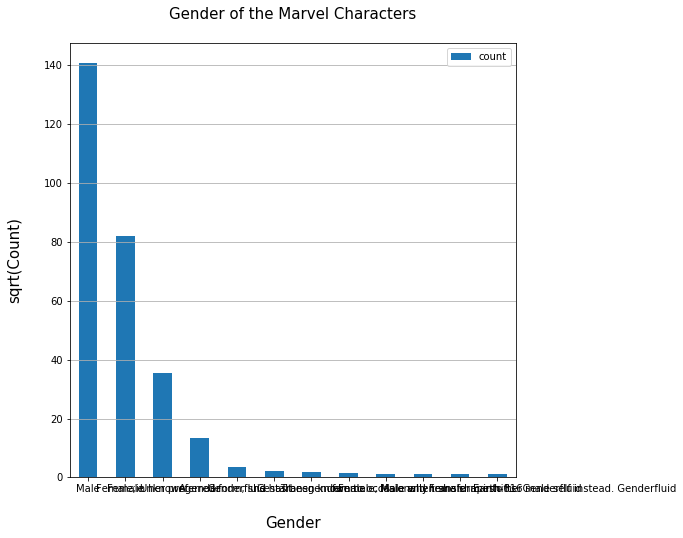

In [36]:
ax = Gender_df.plot.bar(x='Gender', y='count', rot=0, figsize=(8,8))
ax.set_xlabel('\nGender', fontsize=15)
ax.set_ylabel('sqrt(Count)\n', fontsize=15)
ax.set_title('Gender of the Marvel Characters\n', fontsize=15)
plt.grid(axis='y')

In [37]:
gender_VS_eye = personnage[['Gender','Eyes','Real Name']].groupby(['Gender','Eyes']).count()\
                                                         .rename(columns={'Real Name':'Count'})\
                                                         .sort_values(by='Gender', ascending=False)#\
                                                         #.reset_index()
gender_VS_eye

Count
Gender  Eyes                                                     
female  Unknown                                                 1
        Brown                                                   1
Unknown Gold                                                    1
        None                                                    2
        No Eyes                                                25
...                                                           ...
Agender Variable White bonded to MulliganBlack and Red ...      1
        White                                                  21
        White Or redWhite or yellow when bonded to Carn...      1
        Yellow                                                  8
        Black                                                  12

[787 rows x 1 columns]

In [38]:
personnage['Occupation'].value_counts().head(50)

Unknown                  8701
Student                   645
Criminal                  601
Scientist                 428
Adventurer                322
Mercenary                 294
Soldier                   248
Terrorist                 237
Warrior                   229
Reporter                  205
Spy                       160
Assassin                  125
Businessman               109
Lawyer                     94
Doctor                     86
Sorcerer                   83
Government agent           81
Thief                      80
Crimelord                  80
Actor                      77
Mobster                    67
Housewife                  65
Politician                 61
Rancher                    61
Spy; Soldier               58
Magician                   56
Police officer             53
Vigilante                  52
Monarch                    50
S.H.I.E.L.D. agent         50
Pirate                     50
Outlaw                     49
Professional criminal      49
Gangster  

In [39]:
personnage[personnage['Real Name'].str.contains('Stark')]

,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float
1201,/wiki/Anthony_Stark_(Onslaught_Reborn)_(Earth-...,Anthony Edward Stark,Secret Identity,Iron Man,American,Single,"Adventurer, Inventor, Industrialist",Multiple PhDs in Physics and Electrical Engine...,Male,Unknown,Unknown,Blue,Black,Second Counter Earth,Unknown,NaN,Unknown,NaN
1225,/wiki/Anthony_Stark_(Third_A.I.)_(Earth-616),"Anthony ""Tony"" Stark",No Dual Identity,Unknown,American,Single,Virtual Assistant,Unknown,Male,Unknown,Unknown,No Eyes,No Hair,Unknown,Unknown,NaN,Unknown,NaN
1230,/wiki/Anthony_Stark_(Fourth_A.I.)_(Earth-616),"Anthony ""Tony"" Stark",No Dual Identity,Unknown,American,Single,Virtual Assistant,Unknown,Male,Unknown,Unknown,No Eyes,No Hair,Unknown,Unknown,NaN,Unknown,NaN
1290,/wiki/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",Public Identity,Iron Man,"American, Bulgarian",Single,"Mechanical Engineer, adventurer, inventor, ind...","MIT (Massachusetts Institute of Technology), m...",Male,"6' 1"" (1.85 m) (without armor); 6'6"" (includi...",225 lbs (102 kg) (without armor); 425 lbs (193...,Blue,Black,"Sofia, Bulgaria",185.0,185.0,102.0,102.0
1325,/wiki/Anthony_Stark_(Counter-Earth)_(Earth-616),"Anthony ""Tony"" Stark",No Dual Identity,Unknown,Unknown,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
1393,/wiki/Anthony_Stark_(First_A.I.)_(Earth-616),Anthony Stark,Secret Identity,Iron Man,American,Single,Unknown,Unknown,Male,Unknown,Unknown,No Eyes,No,Stark Industries,Unknown,NaN,Unknown,NaN
1624,/wiki/Arno_Stark_(Earth-616),Arno Stark,No Dual Identity,Unknown,American,Single,Custodian of Troy,Unknown,Male,Unknown,Unknown,Blue,Black,"Long Island, New York",Unknown,NaN,Unknown,NaN
3631,/wiki/Caleb_Starke_(Earth-616),Caleb Starke,No Dual Identity,Unknown,British,Unknown,Leader of a religious sect,Unknown,Male,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
4406,/wiki/Charlie_Stark_(Earth-616),Charlie Stark,No Dual Identity,Unknown,American,Unknown,Rancher,Unknown,Male,Unknown,Unknown,Unknown,Brown,Unknown,Unknown,NaN,Unknown,NaN
5671,/wiki/Dargo_Stark_(Warp_World)_(Earth-616),Dargo Stark,Secret Identity,Iron Hammer 2099,"Asgardian, Norwegian",Single,"Adventurer, Businessman",Unknown,Male,Unknown,Unknown,Blue,Blond,Unknown,Unknown,NaN,Unknown,NaN


***We delete the row where every element is 'Unknown'***

In [40]:
unknown = (personnage['Identity']=='Unknown') &\
                 (personnage['Real Name']=='Unknown') &\
                 (personnage['Current Alias']=='Unknown') &\
                 (personnage['Occupation']=='Unknown') &\
                 (personnage['Gender']=='Unknown') &\
                 (personnage['Place of Birth']=='Unknown') &\
                 (personnage['Eyes']=='Unknown') &\
                 (personnage['Citizenship']=='Unknown') &\
                 (personnage['Education']=='Unknown')

personnage[unknown].head(20)
personnage = personnage.drop(personnage[unknown].index)
personnage[unknown]

/Users/jordanmetz/anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


,URL,Real Name,Identity,Current Alias,Citizenship,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float


## Loading and cleaning the DC dataset

In [41]:
dc_pers = pd.read_pickle("perso_dc.txt")
dc_pers_df = pd.DataFrame(dc_pers[0])
dc_pers_df_1 = pd.DataFrame(dc_pers[1])
#Concatenate both dataframes
dc_pers_df = pd.concat([dc_pers_df, dc_pers_df_1], ignore_index=True)
dc_pers_df.head(20)

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth
0,https://dc.fandom.com//wiki/Adam_Blake_(The_Nail),Adam Blake,Secret Identity,Captain Comet,,Good,,,,Male,,,Hazel,Brown,
1,https://dc.fandom.com//wiki/Ada_LaBostrie_(New...,Ada LaBostrie,Public Identity,Ada LaBostrie,American,Good,Married,Housewife,,Female,,,Brown,Black,
2,https://dc.fandom.com//wiki/Adellca_(New_Earth),Adellca,Secret Identity,Green Lantern,,Good,Single,Green Lantern,,Female,,,Black,Black,
3,https://dc.fandom.com//wiki/A-1_(Prime_Earth),Artificial Intelligence Data Flow,,A-I,,Good,Single,,,,,,,,
4,https://dc.fandom.com//wiki/Ace_Egan_(Quality_...,Ace Egan,Secret Identity,Ace of Space,,Good,,,,Male,,,,,New York
5,https://dc.fandom.com//wiki/Abigail_Cable_(The...,Abigail Cable,,,,Good,,,,Female,,,Blue,White,
6,https://dc.fandom.com//wiki/Abraham_Arlington_...,Abraham Arlington,,Azrael,British,Good,,,,Male,,,,,
7,https://dc.fandom.com//wiki/Abisha_(Prime_Earth),Abisha (surname unknown),Public Identity,Abisha,,Good,Single,Bodyguard,,Male,,,Black,Bald,
8,https://dc.fandom.com//wiki/Alan_Scott_(DC_Uni...,Alan Scott,Secret Identity,Green Lantern,American,Good,,,,Male,,,,Blond,
9,https://dc.fandom.com//wiki/Adam_Strange_(Kryp...,Adam Strange,Public Identity,,American,Good,,,College (abandoned),Male,,,Blue,Light Brown,Earth


***Let us clean the data set, starting with the Real Name column***

In [42]:
print('Missing Values : {}'.format(dc_pers_df['Real Name'].isnull().sum()))
dc_pers_df['Real Name'].value_counts()

Missing Values : 0


Unknown                                4335
Bruce Wayne                             164
Kal-El                                  118
Lois Lane                                86
None                                     75
                                       ... 
Theo Adam                                 1
Esi Jiwe                                  1
Donna Cabot                               1
Helen                                     1
Mr. Longshadow (first name unknown)       1
Name: Real Name, Length: 10877, dtype: int64

In [43]:
dc_pers_df["Real Name"] = dc_pers_df["Real Name"].str.replace(r'\s\[\d\]', '')
dc_pers_df["Real Name"] = dc_pers_df["Real Name"].str.replace(r'\[\d\]', '')
dc_pers_df.loc[dc_pers_df['Real Name']=='None', 'Real Name'] ='Unknown'
dc_pers_df.loc[dc_pers_df['Real Name']=='', 'Real Name'] ='Unknown'
dc_pers_df['Real Name'].value_counts()

Unknown                           4470
Bruce Wayne                        164
Kal-El                             118
Lois Lane                           86
Alfred Pennyworth                   64
                                  ... 
Charles Collins                      1
Wylie (first name unknown)           1
Martin Berger                        1
Cecil Geekywad Bumwimple             1
MacIntyre (first name unknown)       1
Name: Real Name, Length: 10865, dtype: int64

***Identity***

In [44]:
dc_pers_df['Identity'].value_counts()

Public Identity    9400
Secret Identity    8145
                   4642
secret Identity       2
public Identity       1
Name: Identity, dtype: int64

In [45]:
dc_pers_df["Identity"] = dc_pers_df["Identity"].replace([''], 'Unknown')
dc_pers_df.loc[dc_pers_df['Identity']=='secret Identity', 'Identity'] = 'Secret Identity'
dc_pers_df.loc[dc_pers_df['Identity']=='public Identity', 'Identity'] = 'Public Identity'
dc_pers_df["Identity"].value_counts()

Public Identity    9401
Secret Identity    8147
Unknown            4642
Name: Identity, dtype: int64

***Current Alias***

In [46]:
dc_pers_df["Current Alias"] = dc_pers_df["Current Alias"].str.replace(r'\s\[\d\]', '')
dc_pers_df["Current Alias"] = dc_pers_df["Current Alias"].str.replace(r'\[\d\]', '')
dc_pers_df["Current Alias"] = dc_pers_df["Current Alias"].replace([''], 'Unknown')

In [47]:
dc_pers_df['Current Alias'].value_counts().head(5)

Unknown          4968
Green Lantern     444
Batman            202
Superman          149
Wonder Woman       98
Name: Current Alias, dtype: int64

***Citizenship***

In [48]:
def clean_citizen (s):
    s = str(s)
    s = s.replace(r'\s\[\d\]', '')
    s = s.replace(r'\[\d\]', '')
    if s == '':
        return 'Unknown'
    elif s == 'English':
        return 'British'
    elif s == 'Amerikan':
        return 'American'
    elif '·' in s:
        ss = s.split()
        return ss[0].strip()
    elif '/' in s:
        ss = s.split(sep = '/')
        return ss[0].strip()
    elif ';' in s:
        ss = s.split(sep = ';')
        return ss[0].strip()
    elif 'American' in s:
        return 'American'
    elif 'Japanese' in s:
        return 'Japanese'
    elif 'Australian' in s:
        return 'Australian'
    elif 'German' in s:
        return 'German'
    else:
        return s.strip()

dc_pers_df["Citizenship"] = dc_pers_df["Citizenship"].apply(clean_citizen)

In [49]:
dc_pers_df["Citizenship"].value_counts()

American                  11107
Unknown                    7540
British                     477
Amazon                      306
United Planets Citizen      285
                          ...  
Karlovnan                     1
Tundan                        1
Yemeni                        1
Hun                           1
Nicaraguan                    1
Name: Citizenship, Length: 170, dtype: int64

***Marital Status***

In [50]:
dc_pers_df["Marital Status"] = dc_pers_df["Marital Status"].apply(clean_marital)

In [51]:
dc_pers_df["Marital Status"].value_counts()

Unknown      10848
Single        8893
Married       1588
Widowed        533
Divorced       230
Engaged         71
Separated       25
Remarried        2
Name: Marital Status, dtype: int64

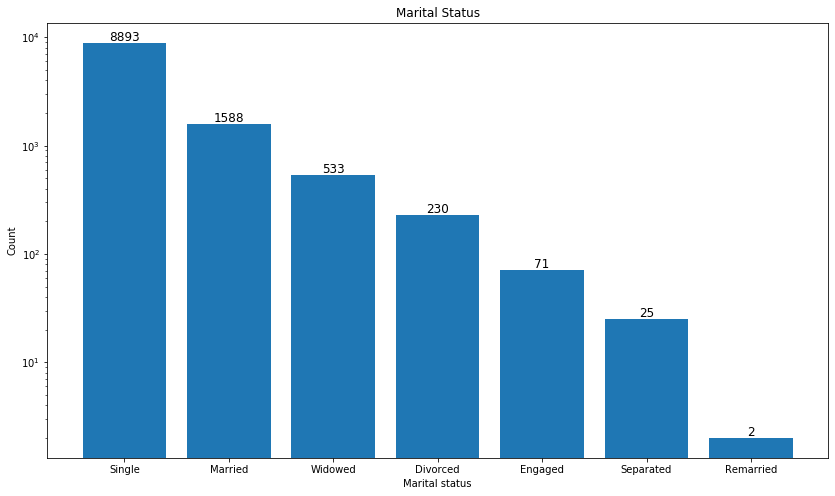

In [52]:
nb_unknown = dc_pers_df["Marital Status"].value_counts()['Unknown']
hist_marital = dc_pers_df["Marital Status"].value_counts().drop('Unknown')

#plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.bar(x = hist_marital.index, height = hist_marital);
axs.set_title('Marital Status')
axs.set_xlabel('Marital status')
axs.set_ylabel('Count')
axs.set_yscale('log')
for i, v in enumerate(hist_marital):
    axs.text(hist_marital.index[i], v*1.05, str(v), color='black', fontsize=12, horizontalalignment='center')

***Occupation***

In [53]:
dc_pers_df["Occupation"].value_counts()

                                                              10297
Criminal                                                        648
Scientist                                                       421
Adventurer                                                      402
Student                                                         349
                                                              ...  
Soldier, General, Governor, President of the United States        1
Nazi spy                                                          1
Circus Performer, Vigilante, Criminal                             1
Administrator of Protection · Wingman commander                   1
Radium Research                                                   1
Name: Occupation, Length: 4254, dtype: int64

In [54]:
def basic_clean(s):
    if s == '':
        return 'Unknown'
    s = s.replace(r'\s\[\d+\]', '')
    s = s.replace(r'\[\d+\]', '')
    return s

In [55]:
dc_pers_df["Occupation"] = dc_pers_df["Occupation"].apply(basic_clean)
dc_pers_df["Occupation"].value_counts()

Unknown                                            10298
Criminal                                             648
Scientist                                            421
Adventurer                                           402
Student                                              349
                                                   ...  
Circus Performer, Vigilante, Criminal                  1
Administrator of Protection · Wingman commander        1
Occult Investigator                                    1
Keeper of Lore                                         1
Scientist · Student                                    1
Name: Occupation, Length: 4253, dtype: int64

***Education***

In [56]:
dc_pers_df["Education"] = dc_pers_df["Education"].apply(basic_clean)
dc_pers_df["Education"].value_counts()

Unknown                                      21635
College Graduate                                38
Amazonian                                       26
High School                                     24
Programmed by Dr. Magnus                        20
                                             ...  
Bowdoin College                                  1
M.I.T.                                           1
College graduate (majoring in archeology)        1
Adams Junior High                                1
Self educated                                    1
Name: Education, Length: 303, dtype: int64

In [57]:
def clean_educ(s):
    if s == "High school graduate":
        return 'High School'
    elif s == "High School Graduate":
        return 'High School'
    elif s == "High School graduate":
        return 'High School'
    elif s == "High School student":
        return 'High School'
    elif s == "High School Student":
        return 'High School'
    elif s == "High school student":
        return 'High School'
    elif s == "High-school dropout":
        return 'High School Dropout'
    elif s == "High school dropout":
        return 'High School Dropout'
    elif s == "High school drop-out":
        return 'High School Dropout'
    elif s == "High school":
        return 'High School'
    elif s == "Some high school":
        return 'High School'
    elif s == "Some college":
        return 'College'
    elif s == "College Graduate":
        return 'College'
    elif s == "College graduate":
        return 'College'
    elif s == "College educated":
        return 'College'
    elif s == "College education":
        return 'College'
    elif s == "College degree":
        return 'College'
    elif s == "University graduate":
        return 'University'
    elif s == "Ph.D.":
        return 'Doctorate'
    elif s == "PhD":
        return 'Doctorate'
    else:
        return s
    
dc_pers_df["Education"] = dc_pers_df["Education"].apply(clean_educ)
dc_pers_df["Education"].value_counts()

Unknown                       21635
College                          68
High School                      42
Amazonian                        26
Programmed by Dr. Magnus         20
                              ...  
Law Degree(s)                     1
Cardy Boarding School             1
Schooled by the Book of Oa        1
25th Century                      1
Self educated                     1
Name: Education, Length: 292, dtype: int64

***Gender***

In [58]:
dc_pers_df["Gender"] = dc_pers_df["Gender"].apply(basic_clean)
dc_pers_df["Gender"].value_counts()

Male           15876
Female          5867
Unknown          366
Genderless        64
female             7
Transgender        6
New Earth          2
male               2
Name: Gender, dtype: int64

In [59]:
def clean_gender(s):
    if s =='male':
        return 'Male'
    elif s =='female':
        return 'Female'
    else:
        return s
    
dc_pers_df["Gender"] = dc_pers_df["Gender"].apply(clean_gender)
dc_pers_df["Gender"].value_counts()   

Male           15878
Female          5874
Unknown          366
Genderless        64
Transgender        6
New Earth          2
Name: Gender, dtype: int64

***Height***

In [60]:
dc_pers_df["Height"] = dc_pers_df["Height"].apply(basic_clean)
dc_pers_df["Height"].value_counts()

Unknown                    19860
5' 11"                       229
6' 0"                        222
5' 10"                       198
6' 2"                        167
                           ...  
6' 8" [3]                      1
1' 3" [citation needed]        1
10' 21"                        1
0' 3" [citation needed]        1
6' 9"                          1
Name: Height, Length: 153, dtype: int64

In [61]:
dc_pers_df["Height in string"] = dc_pers_df["Height"].apply(clean_height)
dc_pers_df["Height in float"] = dc_pers_df["Height in string"].apply(string_to_float)
dc_pers_df["Height in float"].describe()

count    2234.000000
mean      185.813339
std       125.729376
min         8.000000
25%       173.000000
50%       180.000000
75%       188.000000
max      5486.000000
Name: Height in float, dtype: float64

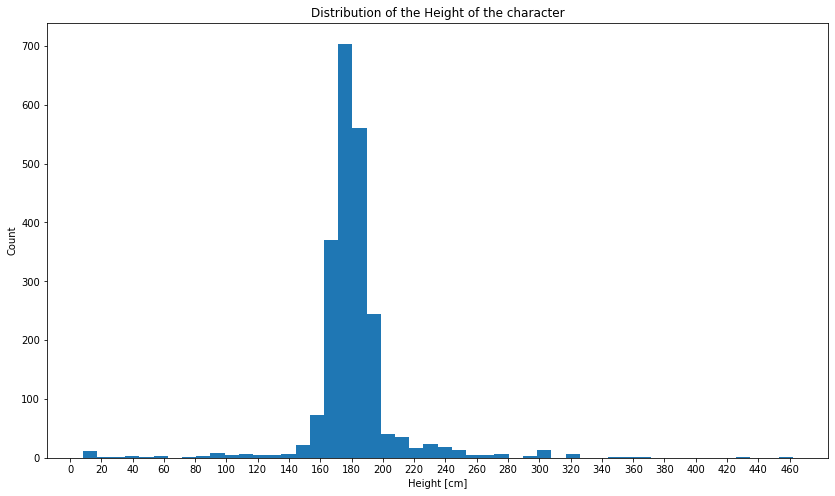

In [62]:
#plot the distribution of height

#number of unknown and variable
nb_unknown = dc_pers_df["Height"].value_counts()['Unknown']
#filter the data to avoid outliers
height_hist = dc_pers_df[(dc_pers_df["Height in float"]!=np.nan)\
                         &(dc_pers_df["Height in float"]<500)]['Height in float']

#plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.hist(height_hist,bins=50);
axs.set_title('Distribution of the Height of the character')
axs.set_xlabel('Height [cm]')
axs.set_ylabel('Count')
plt.xticks(np.arange(0, max(height_hist)+10, 20.0));

***Weight***

In [63]:
dc_pers_df["Weight"] = dc_pers_df["Weight"].apply(basic_clean)
dc_pers_df["Weight"].value_counts()

Unknown                  20015
175 lbs (79 kg)             78
Variable                    69
180 lbs (82 kg)             66
120 lbs (54 kg)             59
                         ...  
180                          1
485 lbs (220 kg)             1
105 lbs (48 kg) [1]          1
120000 lbs (54431 kg)        1
218 lbs (99 kg)              1
Name: Weight, Length: 373, dtype: int64

In [64]:
dc_pers_df["Weight in string"] = dc_pers_df["Weight"].apply(clean_weight)
dc_pers_df["Weight in float"] = dc_pers_df["Weight in string"].apply(string_to_float)
dc_pers_df["Weight in float"].describe()

count     2078.000000
mean       150.653994
std       1461.481409
min          0.000000
25%         63.000000
50%         79.000000
75%         93.000000
max      54360.000000
Name: Weight in float, dtype: float64

In [65]:
dc_pers_df["Weight"].value_counts()['Variable ']

69

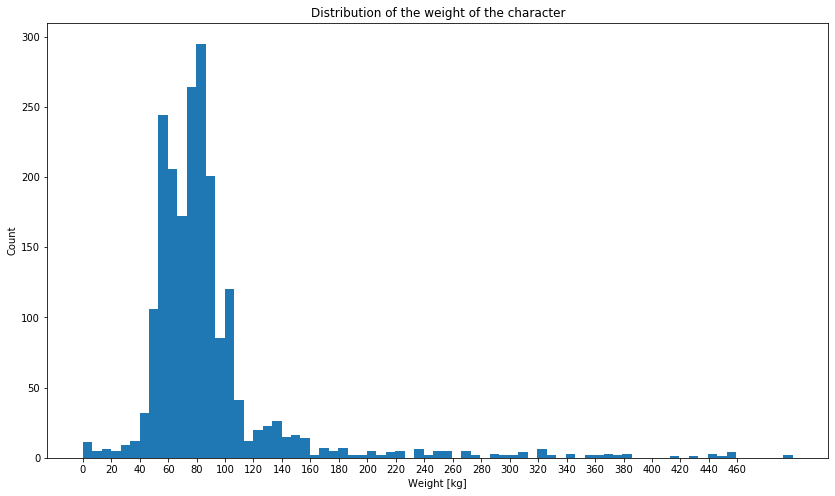

In [66]:
#plot the distribution of Weight

#number of unknown and variable
nb_unknown = dc_pers_df["Weight"].value_counts()['Unknown']+dc_pers_df["Weight"].value_counts()['Variable ']
#filter the data to avoid outliers
weight_hist = dc_pers_df[(dc_pers_df["Weight in float"]!=np.nan)\
                         &(dc_pers_df["Weight in float"]<500)]['Weight in float']

#plot histogram
fig, axs = plt.subplots(1, 1, figsize=(14,8))
axs.hist(weight_hist,bins=75);
axs.set_title('Distribution of the weight of the character')
axs.set_xlabel('Weight [kg]')
axs.set_ylabel('Count')
plt.xticks(np.arange(0, max(height_hist)+10, 20.0));

***Eyes***

In [67]:
dc_pers_df["Eyes"] = dc_pers_df["Eyes"].apply(basic_clean)
dc_pers_df["Eyes"].value_counts()

Unknown                                   10790
Blue                                       3739
Brown                                      2708
Black                                      1646
Green                                      1103
                                          ...  
Flaming                                       1
Yellow · Purple                               1
Brown ·  White                                1
Red · Green                                   1
Yellow (Spectre) ·  Green (human form)        1
Name: Eyes, Length: 147, dtype: int64

In [68]:
def clean_eye(s):
    
    if s == 'No Eyes':
        return 'No eyes'
    try:
        ss = s.split()
        if '(' in ss[0]:
            if s == '(as Kristin) Colorless ·  (as Snowman) Red':
                return 'Colorless'
        else:
            res = ss[0].strip()
            if '-' in res:
                sss = res.split('-')
                return(sss[0])
            else:
                return res.strip(';')
    except:
        print(s)
        return s

        
dc_pers_df["Eyes"] = dc_pers_df["Eyes"].apply(clean_eye)
dc_pers_df["Eyes"].value_counts()

Unknown          10790
Blue              3800
Brown             2751
Black             1669
Green             1123
Red                720
White              331
Yellow             324
Grey               144
No eyes            116
Photocellular       92
Hazel               80
Purple              67
Orange              41
Violet              33
Pink                28
Gold                28
Amber               18
Silver               9
Gray                 5
Blond                3
Variable             2
Indigo               2
red                  2
blue                 2
Bald                 1
brown                1
Dark                 1
violet               1
Pale                 1
Fire                 1
Flaming              1
Diamond              1
Colorless            1
Mirrored             1
Name: Eyes, dtype: int64

***Hair***

In [69]:
dc_pers_df["Hair"] = dc_pers_df["Hair"].apply(basic_clean)
dc_pers_df["Hair"].value_counts()

Black                         5462
Unknown                       4360
Brown                         3448
Blond                         2390
Red                           1348
                              ... 
Gold ·  Blond                    1
White ·  Black ·  Balding        1
White; None                      1
Grey · [1]                       1
Bald · Brown ·  (ponytail)       1
Name: Hair, Length: 267, dtype: int64

In [70]:
def clean_hair(s):
    if 'No Hair' in s:
        return 'No Hair'
    if ' ·' in s:
        ss = s.split()
        s =  ss[0].strip(';').strip('.').strip()
    if ' (' in s:
        ss = s.split()
        s = ss[0].strip(';').strip('.').strip()
    if '; ' in s:
        ss = s.split(';')
        s = ss[0].strip(';').strip('.').strip()
    if '/' in s:
        ss = s.split('/')
        s =  ss[0].strip(';').strip('.').strip()
    if '[' in s:
        ss = s.split('[')
        s = ss[0].strip(';').strip('.').strip()
    if 'Blonde' in s:
        return 'Blond'
    else:
        s = s.strip(';')
        s = s.strip('.')
        return s.strip()
    
dc_pers_df["Hair"] = dc_pers_df["Hair"].apply(clean_hair)
dc_pers_df["Hair"].value_counts()

Black                           5616
Unknown                         4361
Brown                           3550
Blond                           2440
Red                             1375
No Hair                         1233
White                           1147
Bald                            1074
Grey                             599
Green                            207
Blue                             102
Orange                            98
Auburn                            91
Purple                            91
Strawberry Blond                  50
Pink                              43
Silver                            23
Gold                              17
Light Brown                       15
Yellow                            15
Violet                             5
Balding                            3
black                              3
Platinum Blond                     3
white                              3
Auborn                             2
Auburn with white highlights       2
L

***Place of Birth***

In [71]:
dc_pers_df["Place of Birth"] = dc_pers_df["Place of Birth"].apply(basic_clean)
dc_pers_df["Place of Birth"].value_counts()

Unknown                              18583
Krypton                                315
Gotham City                            208
Apokolips                               83
Germany                                 78
                                     ...  
Mexico City, Mexico                      1
The Land of Moroos (14th Century)        1
Cygnus                                   1
Possibly Hell                            1
Odiline, Argo City II                    1
Name: Place of Birth, Length: 1082, dtype: int64

***General cleaning***

In [72]:
dc_pers_df

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float
0,https://dc.fandom.com//wiki/Adam_Blake_(The_Nail),Adam Blake,Secret Identity,Captain Comet,Unknown,Good,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Hazel,Brown,Unknown,Unknown,NaN,Unknown,NaN
1,https://dc.fandom.com//wiki/Ada_LaBostrie_(New...,Ada LaBostrie,Public Identity,Ada LaBostrie,American,Good,Married,Housewife,Unknown,Female,Unknown,Unknown,Brown,Black,Unknown,Unknown,NaN,Unknown,NaN
2,https://dc.fandom.com//wiki/Adellca_(New_Earth),Adellca,Secret Identity,Green Lantern,Unknown,Good,Single,Green Lantern,Unknown,Female,Unknown,Unknown,Black,Black,Unknown,Unknown,NaN,Unknown,NaN
3,https://dc.fandom.com//wiki/A-1_(Prime_Earth),Artificial Intelligence Data Flow,Unknown,A-I,Unknown,Good,Single,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN
4,https://dc.fandom.com//wiki/Ace_Egan_(Quality_...,Ace Egan,Secret Identity,Ace of Space,Unknown,Good,Unknown,Unknown,Unknown,Male,Unknown,Unknown,Unknown,Unknown,New York,Unknown,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22185,https://dc.fandom.com//wiki/Zygo_(Prime_Earth),Unknown,Secret Identity,Zygo,Unknown,Bad,Unknown,Scientist,Unknown,Male,Unknown,Unknown,Brown,Brown,Unknown,Unknown,NaN,Unknown,NaN
22186,https://dc.fandom.com//wiki/Zymyr_(Pre-Zero_Hour),Zymyr,Public Identity,Zymyr,United Planets Citizen,Bad,Single,Scientist,Unknown,Male,Unknown,Unknown,No eyes,No Hair,Gil'Dishpan,Unknown,NaN,Unknown,NaN
22187,https://dc.fandom.com//wiki/Z%C3%BCM_(New_Earth),Unknown,Secret Identity,ZüM,Unknown,Bad,Single,Super-Villain,Unknown,Male,Unknown,Unknown,Unknown,No Hair,Ma'aleca'andra,Unknown,NaN,Unknown,NaN
22188,https://dc.fandom.com//wiki/Zyn_(New_Earth),Zyn,Public Identity,Unknown,Unknown,Bad,Unknown,Mercenary,Unknown,Male,Unknown,Unknown,Unknown,Bald,Unknown,Unknown,NaN,Unknown,NaN


In [74]:
unknown = (dc_pers_df['Identity']=='Unknown') &\
                 (dc_pers_df['Real Name']=='Unknown') &\
                 (dc_pers_df['Current Alias']=='Unknown') &\
                 (dc_pers_df['Occupation']=='Unknown') &\
                 (dc_pers_df['Gender']=='Unknown') &\
                 (dc_pers_df['Place of Birth']=='Unknown') &\
                 (dc_pers_df['Eyes']=='unknown') &\
                 (dc_pers_df['Citizenship']=='Unknown') &\
                 (dc_pers_df['Education']=='Unknown')

dc_pers_df[unknown].head(20)

,URL,Real Name,Identity,Current Alias,Citizenship,Good or Bad,Marital Status,Occupation,Education,Gender,Height,Weight,Eyes,Hair,Place of Birth,Height in string,Height in float,Weight in string,Weight in float


***There are no row where there is no information***

***Cleaning of DC Comics character Dataframe is done!!***

## Now use the database!